### Kaggle Survey EDA

In [3]:
# Using Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Setting Plot parameter
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10,5)

In [108]:
# data Loading
df = pd.read_csv("kaggle_survey_2020_responses.csv")

C:\Users\yease\AppData\Local\Temp/ipykernel_38456/1643039811.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("kaggle_survey_2020_responses.csv")


**데이터 전처리**
- 필요한 변수만 추출
> - 응답자의 인구통계 변수(나이, 성별, 국적) : Q1, Q2, Q3  
> - 교육 상태를 나타내는 변수 : Q4  
> - 직업 : Q5
> - 프로그래밍 경력 : Q6
> - 사용 프로그래밍 언어 : Q7-# order
> - 추천 프로그래밍 언어 : Q8
> - 머신러닝 경력 : Q15
> - 고용된 회사의 규모 : Q20
> - 회사에서 머신러닝을 사용하는지 여부 : Q22

In [163]:
# 사용할 컬럼
basic_col = ["Q1","Q2","Q3"]

education_col = (["Q4","Q6"] 
                 + ["Q7_Part_" + str(i) for i in range(1,13)] 
                 + ["Q7_OTHER","Q8","Q15"])

job_col = ["Q5","Q20","Q22"]

y = ['Q24']

# df 생성
df = df.loc[1:,basic_col + education_col + job_col + y]

In [110]:
# Na -> 무응답으로 처리
df.fillna("I prefer not to answer",inplace= True)

**Frequency Table**

In [164]:
print("최종 학위 Frequency Table :")

pd.DataFrame({"#Num" : df["Q4"].value_counts(),
              "Prob.": df["Q4"].value_counts(normalize= True)})

최종 학위 Frequency Table :


,#Num,Prob.
Master’s degree,7859,0.392244
Bachelor’s degree,6978,0.348273
Doctoral degree,2302,0.114893
Some college/university study without earning a bachelor’s degree,1092,0.054502
I prefer not to answer,866,0.043222
Professional degree,699,0.034887
No formal education past high school,240,0.011978


**Pie chart**

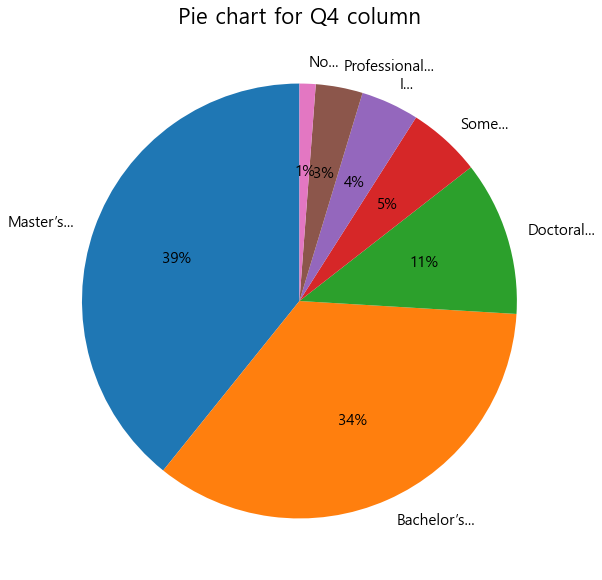

In [166]:
# pie chart
plt.figure(figsize = (10,10))

plt.pie(df['Q4'].value_counts(),
        labels = [i.split(" ")[0] + '...' for i in df['Q4'].value_counts().index],
        autopct = '%d%%',
        startangle = 90,
        textprops = {'fontsize' : 15})
plt.title("Pie chart for Q4 column", fontsize = 22)
plt.show()

**count plot**

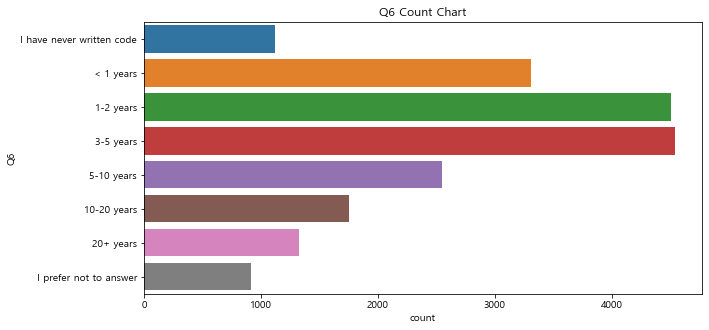

In [84]:
sns.countplot(data = df, y = 'Q6',
              order = df["Q6"].value_counts().index[[6,2,1,0,3,4,5,7]])
plt.title("Q6 Count Chart")
plt.show()

> **▼Logest yticks label** 

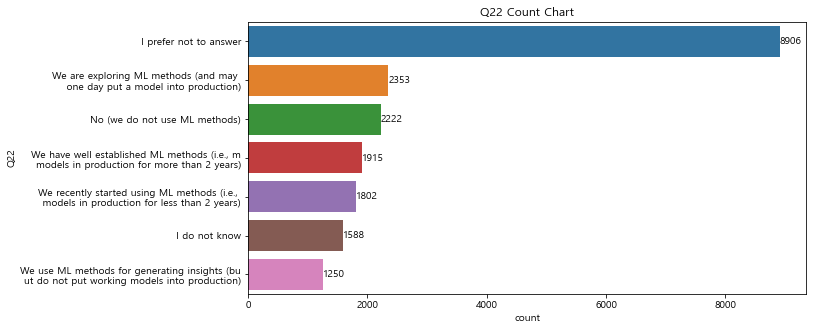

In [160]:
ax = sns.countplot(data = df, y = 'Q22',
                   order = df["Q22"].value_counts().index)
values = df["Q22"].value_counts().values
ax.bar_label(container = ax.containers[0], label = values)
ax.set_yticklabels(labels= ([i if len(i) <= 30
                               else i[:len(i)//2 + 1] + '\n' + i[len(i)//2:] 
                               for i in df["Q22"].value_counts().index ]))

plt.title("Q22 Count Chart")
plt.show()